<h1 style="font-family:Corbel Light; color:#00ced1">Projet 5 : Segmentez des clients d'un site e-commerce </h1>

<h2 style="font-family:Corbel Light; color:#737373"><span style="color:#00ced1">Étape 3</span> : Proposition de contrat de maintenance </h2>

<h3 style="font-family:Corbel Light; color:#737373">Requirements</h3>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import toolbox

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

%matplotlib inline
pd.options.display.float_format = '{:_.2f}'.format

In [2]:
python_version = !python -V
print('python version :', python_version,'\n')

print('pandas version : ', pd.__version__, '\n')
print('numpy version : ', np.__version__, '\n')
print('matplotlib version : ', matplotlib.__version__, '\n')
print('seaborn version : ', sns.__version__, '\n')
print('scikit-learn version : ', sklearn.__version__, '\n')

python version : ['Python 3.9.12'] 

pandas version :  1.4.2 

numpy version :  1.21.5 

matplotlib version :  3.5.1 

seaborn version :  0.12.1 

scikit-learn version :  1.2.1 



**Versions utilisées :**

- python : Python 3.9.12 
- seaborn    :  0.12.1
- matplotlib :  3.5.1 
- numpy  :  1.21.5 
- pandas :  1.4.2
- scikit-learn  :  1.2.1

<h3 style="font-family:Corbel Light; color:#737373">Simulations</h3>

Méthode appliquée : 

- soit une période d'initialisation p (ex: p=12 mois), 
- on va filtrer le masterdataset sur les commandes effectuées pendant cette période et agréger ces commandes pour obtenir C0 un jeu de données contenant uniquement les clients ayant commandé pendant cette période.
- puis on va entrainer un premier modèle M0 avec C0
- et à chaque itération i on va ajouter une semaine (jusqu'à atteindre la dernière date à laquelle nous avons des données - 17 octobre 2018) et 
    - construire un jeu de données Ci contenant les clients ayant commandé pendant la nouvelle période p + i semaines
    - entrainer un nouveau modèle Mi avec Ci
    - comparer les clusterings de Mi sur Ci et de M0 sur Ci, en calculant l'indice de Rand ajusté.
- enfin on va tracer un graph avec en abscisse l'itération en semaine et en ordonnée l'ARI correspondant. Le modèle devra être réentrainé dès que l'ARI passe en dessous de 0.8.

In [3]:
files_path = {"order_data": 'olist_orders_dataset.csv',
              "customer_data": 'olist_customers_dataset.csv',
              "payments_data": 'olist_order_payments_dataset.csv',
              "items_data": 'olist_order_items_dataset.csv',
              "reviews_data": 'olist_order_reviews_dataset.csv',
              "product_data": 'olist_products_dataset.csv',
              "category_data": 'product_category_name_translation.csv'
              }

to_date = {"order_data": ['order_purchase_timestamp',
                          'order_approved_at',
                          'order_delivered_carrier_date',
                          'order_delivered_customer_date',
                          'order_estimated_delivery_date'
                          ],
           "reviews_data": ['review_creation_date', 'review_answer_timestamp']
           }

In [4]:
datasets = toolbox.read_csv_files(files_path, True, to_date)
master_dataset = toolbox.build_master_dataset(datasets)

In [5]:
order_data = datasets['order_data']

oldest_order = order_data['order_purchase_timestamp'].min().date()
most_recent_order = order_data['order_purchase_timestamp'].max().date()
print('Nos données vont du {} au {}'.format(oldest_order, most_recent_order))

Nos données vont du 2016-09-04 au 2018-10-17


A 1 an de la date de fin :

In [6]:
ari_score = toolbox.compute_ari_score(master_dataset,
                                      '2016-09-01', '2018-10-19',
                                      '2017-09-01', freq=pd.offsets.Week()
                                      )

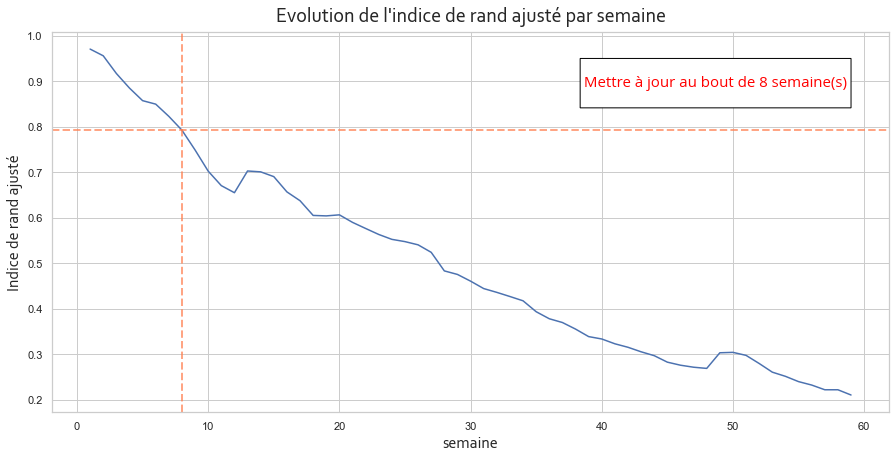

In [7]:
toolbox.display_ari_by_frequency(ari_score, 0.8, 'semaine')

Augmentons la taille de la période d'initialisation et regardons si on obtient le même résultat au voisinage de la date finale

A 6 mois de la fin :

In [8]:
ari_score_2 = toolbox.compute_ari_score(master_dataset,
                                        '2016-09-01', '2018-10-23',
                                        '2018-05-01', freq=pd.offsets.Week()
                                        )

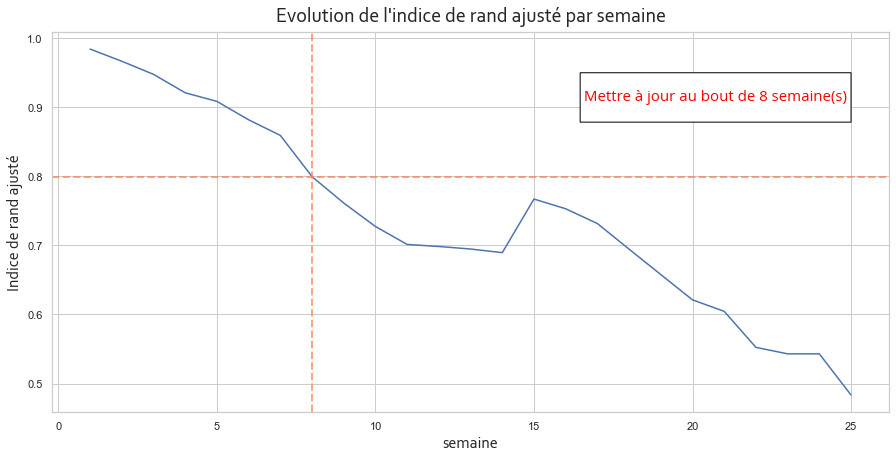

In [9]:
toolbox.display_ari_by_frequency(ari_score_2, 0.8, 'semaine')

A 3 mois de la fin :

In [12]:
ari_score_3 = toolbox.compute_ari_score(master_dataset,
                                        '2016-09-01', '2018-10-17',
                                        '2018-07-25', freq=pd.offsets.Week()
                                        )

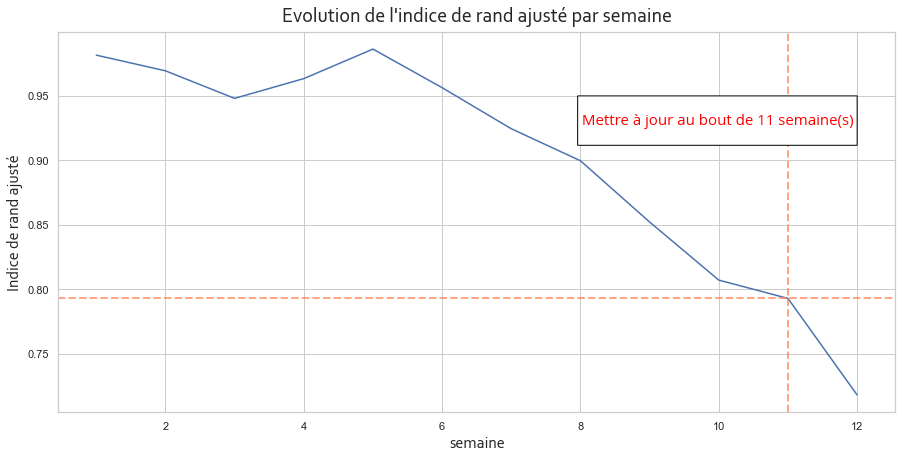

In [13]:
toolbox.display_ari_by_frequency(ari_score_3, 0.8, 'semaine')

<h3 style="font-family:Corbel Light; color:#737373">Conclusion</h3>

En s'appuyant sur les simulations précédentes, on peut proposer à Olist de mettre la segmentation à jour tous les 2 mois ou de recalculer ce score ARI toutes les semaines et dès qu'il passe sous 0.8 déclencher automatiquement le réapprentissage du modèle.